# Heart Failure Prediction Assignment

## Objective
The goal of this assignment is to analyze the **heart failure clinical records** dataset and build a machine learning model to predict the occurrence of a **death event** in patients with heart failure. You will perform exploratory data analysis (EDA), visualize trends, and apply classification models to predict the target variable.

## Dataset Overview

The dataset consists of 13 variables, each representing clinical features and demographic information of heart failure patients:

1. **age**: Age of the patient (years)
2. **anaemia**: Whether the patient has anaemia (0: no, 1: yes)
3. **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes**: Whether the patient has diabetes (0: no, 1: yes)
5. **ejection_fraction**: Percentage of blood leaving the heart with each contraction (%)
6. **high_blood_pressure**: Whether the patient has high blood pressure (0: no, 1: yes)
7. **platelets**: Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium**: Level of serum sodium in the blood (mEq/L)
10. **sex**: Gender of the patient (1: male, 0: female)
11. **smoking**: Whether the patient smokes (0: no, 1: yes)
12. **time**: Follow-up period (days)
13. **DEATH_EVENT**: Whether the patient died during the follow-up period (0: no, 1: yes) [Target Variable]



1.**Data Exploration (EDA)**
   
Task 1: Load the dataset using pandas and display the first few rows.

Task 2: Check for missing values and clean the data if necessary.

Task 3: Generate summary statistics for the numerical columns.

Task 4: Visualize the distribution of the target variable (DEATH_EVENT).

Task 5: Plot histograms or box plots for continuous variables like age, creatinine_phosphokinase, ejection_fraction, serum_creatinine, etc.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


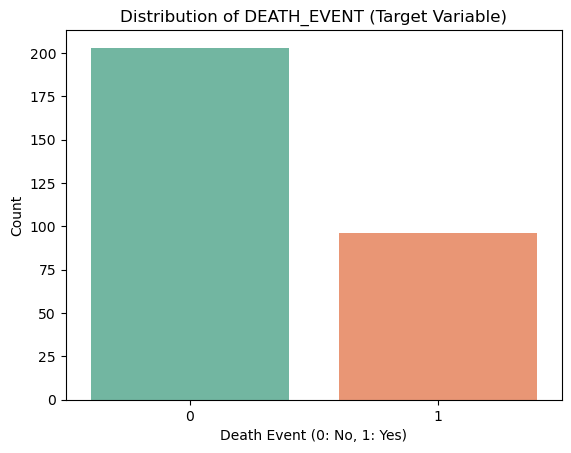

In [6]:
sns.countplot(x='DEATH_EVENT', data=df, palette='Set2')
plt.title('Distribution of DEATH_EVENT (Target Variable)')
plt.xlabel('Death Event (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

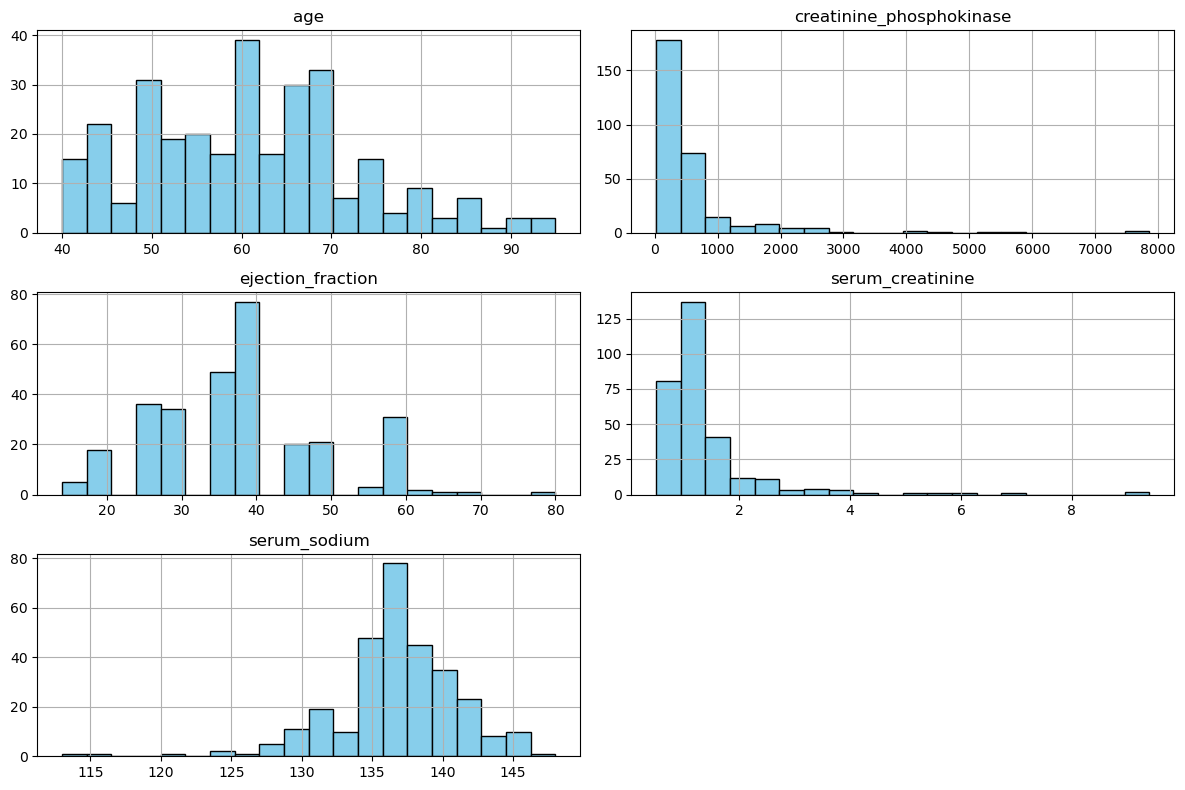

In [7]:
continuous_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
df[continuous_vars].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

2. **Data Visualization¶**
   
Task 6: Create a correlation matrix heatmap to understand the relationships between the features.

Task 7: Create count plots or bar charts for categorical variables like anaemia, diabetes, high_blood_pressure, sex, and smoking.

Task 8: Create scatter plots or pair plots for continuous variables like age vs ejection_fraction, serum_creatinine, etc., colored by DEATH_EVENT.

In [8]:
correlation_matrix = df.corr()
correlation_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


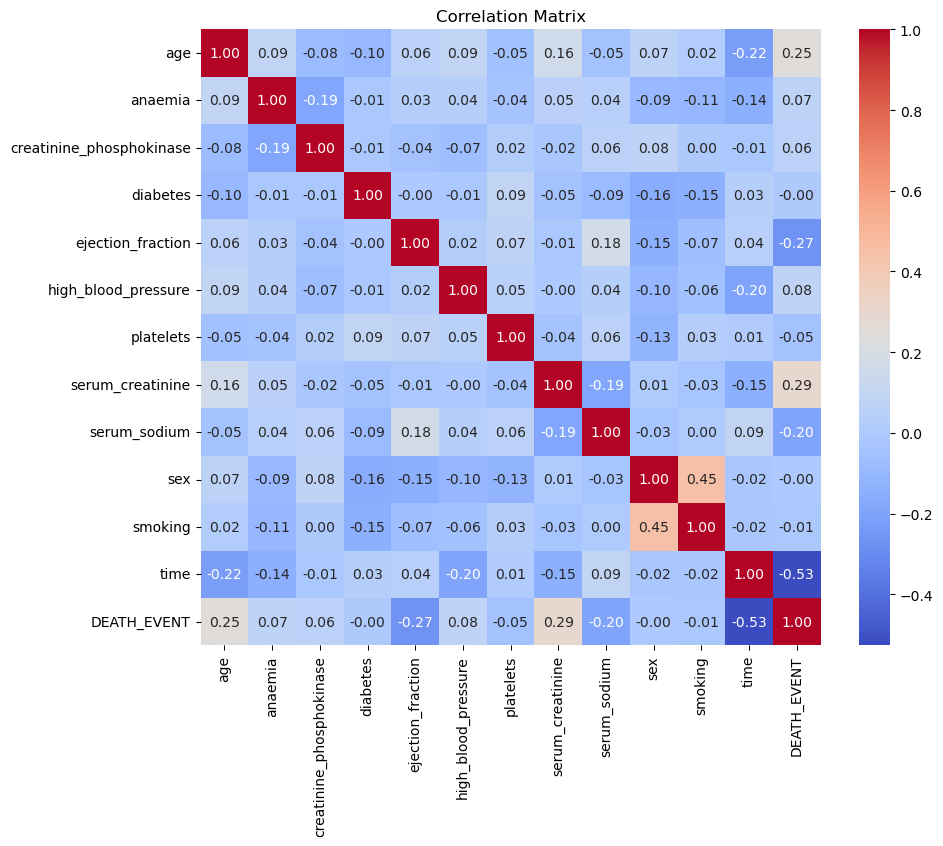

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

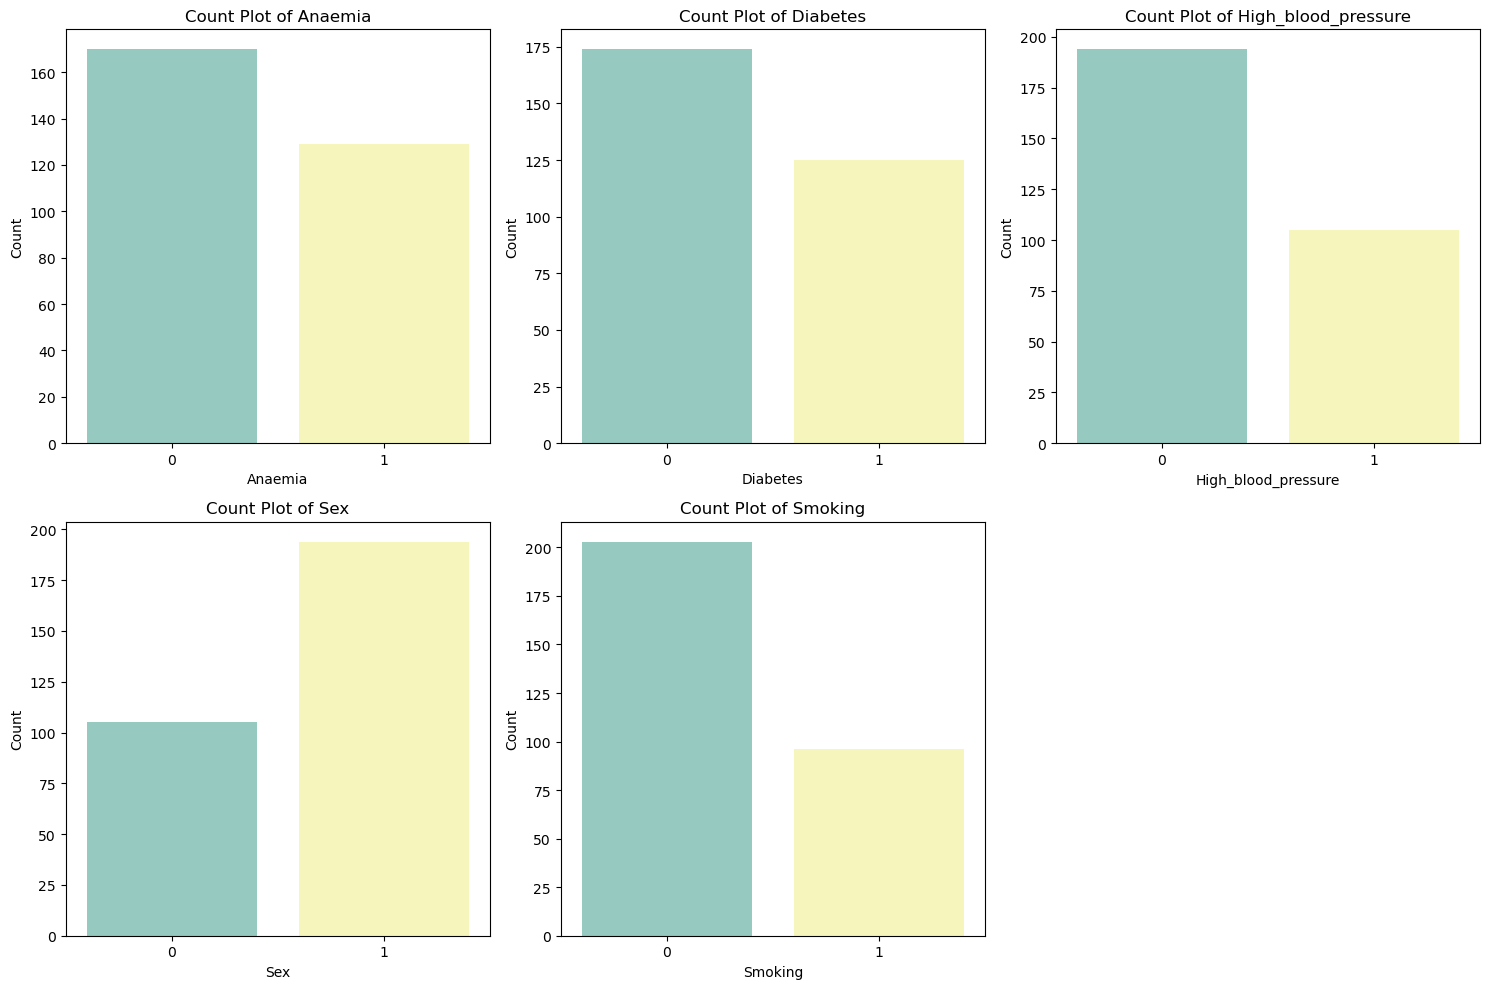

In [10]:
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=var, data=df, palette='Set3')
    plt.title(f'Count Plot of {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Ejection Fraction (%)')

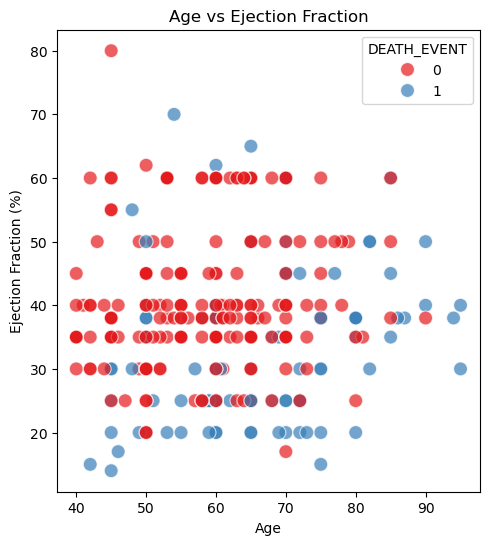

In [11]:
# Task 8: Create scatter plots for continuous variables, colored by DEATH_EVENT
plt.figure(figsize=(12, 6))

# Scatter plot: Age vs Ejection Fraction, colored by DEATH_EVENT
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='ejection_fraction', hue='DEATH_EVENT', data=df, palette='Set1', s=100, alpha=0.7)
plt.title('Age vs Ejection Fraction')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction (%)')

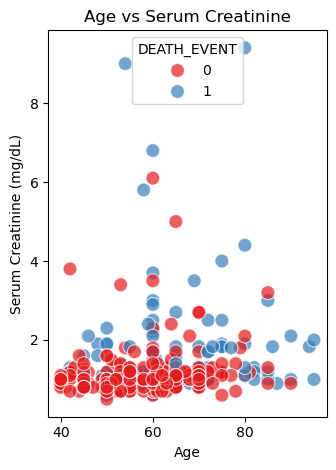

In [12]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='serum_creatinine', hue='DEATH_EVENT', data=df, palette='Set1', s=100, alpha=0.7)
plt.title('Age vs Serum Creatinine')
plt.xlabel('Age')
plt.ylabel('Serum Creatinine (mg/dL)')

plt.tight_layout()
plt.show()

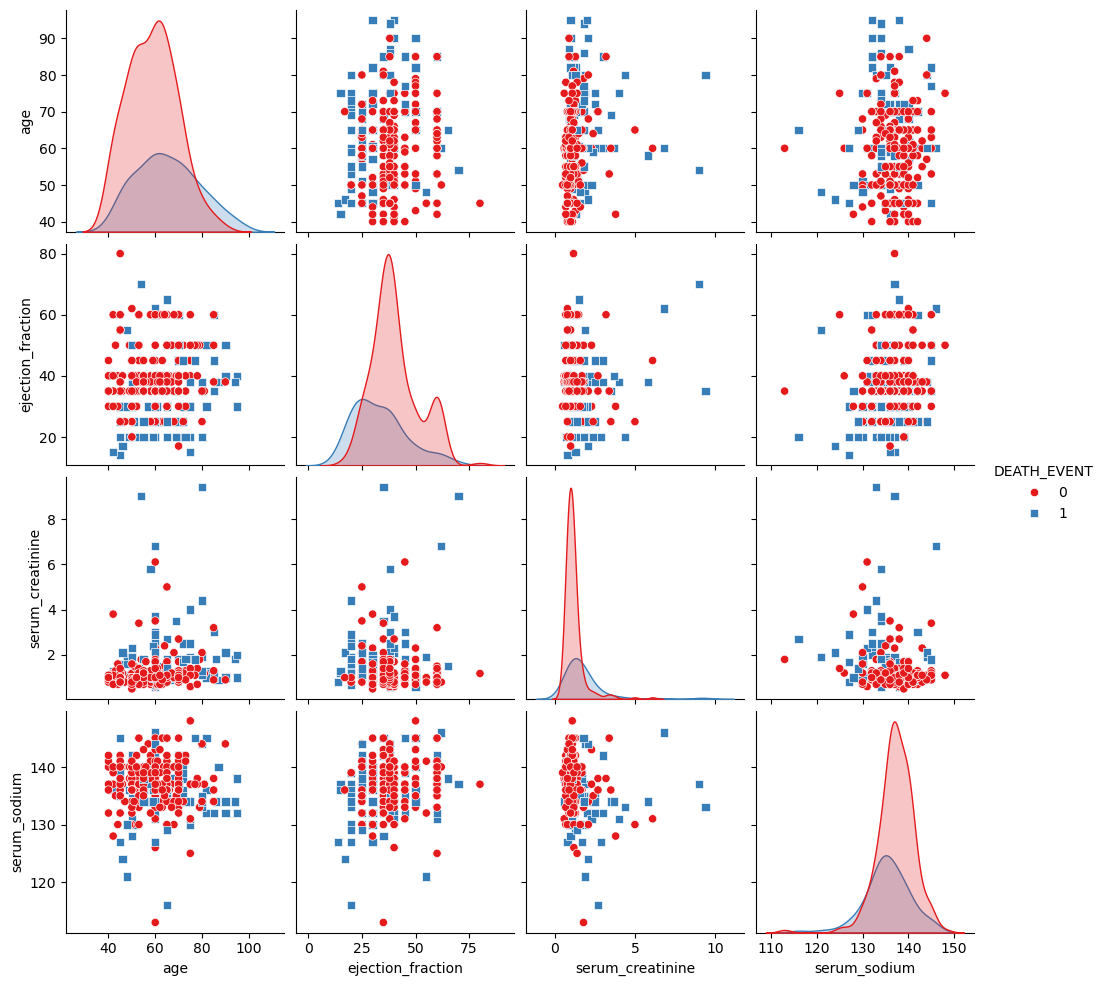

In [13]:
continuous_vars = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
sns.pairplot(df, vars=continuous_vars, hue='DEATH_EVENT', palette='Set1', markers=['o', 's'], diag_kind='kde')
plt.show()

3. **Model Building**
   
Task 9: Split the dataset into features (X) and the target variable (y = DEATH_EVENT).

Task 10: Perform train-test splitting (70% training, 30% testing) using train_test_split from sklearn.

Task 11: Standardize the continuous features using StandardScaler.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT'] 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [17]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
186,50.0,0,582,0,50,0,153000.0,0.6,134,0,0,172
258,45.0,1,66,1,25,0,233000.0,0.8,135,1,0,230
104,60.0,0,53,0,50,1,286000.0,2.3,143,0,0,87
161,45.0,1,130,0,35,0,174000.0,0.8,139,1,1,121
263,68.0,1,157,1,60,0,208000.0,1.0,140,0,0,237


In [18]:
scaler = StandardScaler()

In [19]:
continuous_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'platelets']
X_train[continuous_vars] = scaler.fit_transform(X_train[continuous_vars])
X_test[continuous_vars] = scaler.transform(X_test[continuous_vars])

In [20]:
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Training features shape: (209, 12)
Testing features shape: (90, 12)


4. **Model Training and Evaluation¶**
   
Task 12: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.

Task 13: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.

Task 14: Train a Decision Tree Classifier and compare its performance with other models.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [22]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Logistic Regression Evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

In [23]:
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"Precision: {precision_log_reg:.2f}")
print(f"Recall: {recall_log_reg:.2f}")
print(f"F1-score: {f1_log_reg:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Accuracy: 0.83
Precision: 0.79
Recall: 0.66
F1-score: 0.72

Confusion Matrix:
[[56  5]
 [10 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        61
           1       0.79      0.66      0.72        29

    accuracy                           0.83        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.83      0.83      0.83        90



In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [26]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [27]:
# KNN Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-score: {f1_knn:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Accuracy: 0.82
Precision: 0.84
Recall: 0.55
F1-score: 0.67

Confusion Matrix:
[[58  3]
 [13 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        61
           1       0.84      0.55      0.67        29

    accuracy                           0.82        90
   macro avg       0.83      0.75      0.77        90
weighted avg       0.83      0.82      0.81        90



In [28]:
from sklearn.tree import DecisionTreeClassifier
decision_tree  = DecisionTreeClassifier()

In [29]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred_tree = decision_tree.predict(X_test)

In [31]:
# Decision Tree Evaluation
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

In [32]:
print(f"Accuracy: {accuracy_tree:.2f}")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall: {recall_tree:.2f}")
print(f"F1-score: {f1_tree:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

Accuracy: 0.78
Precision: 0.67
Recall: 0.62
F1-score: 0.64

Confusion Matrix:
[[52  9]
 [11 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        61
           1       0.67      0.62      0.64        29

    accuracy                           0.78        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.77      0.78      0.78        90



5. **Cross Validation**

Task 15: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.
    
Task 16: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [34]:
reg = LogisticRegression()

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [36]:
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=kf, scoring='accuracy')

In [37]:
print("K-Fold Cross-Validation (5 folds) Accuracy Scores:", log_reg_cv_scores)
print(f"Mean Accuracy: {log_reg_cv_scores.mean():.2f}")

K-Fold Cross-Validation (5 folds) Accuracy Scores: [0.78571429 0.80952381 0.76190476 0.80952381 0.92682927]
Mean Accuracy: 0.82


In [38]:
from sklearn.model_selection import StratifiedKFold

In [39]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [40]:
log_reg_skf_scores = cross_val_score(log_reg, X_train, y_train, cv=skf, scoring='accuracy')

In [41]:
print("\nStratified K-Fold Cross-Validation (5 folds) Accuracy Scores:", log_reg_skf_scores)
print(f"Mean Accuracy (Stratified): {log_reg_skf_scores.mean():.2f}")


Stratified K-Fold Cross-Validation (5 folds) Accuracy Scores: [0.83333333 0.78571429 0.80952381 0.78571429 0.87804878]
Mean Accuracy (Stratified): 0.82


6. **Model Improvement¶**

Task 17: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.
    
Task 18: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn_params = {
    'n_neighbors': range(1, 21), 
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]
}

In [45]:
# Initialize GridSearchCV
grid_search_knn = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', verbose=1)
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [46]:
decision_tree = DecisionTreeClassifier(random_state=42)
tree_params = {
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 20),  
    'min_samples_leaf': range(1, 10), 
    'criterion': ['gini', 'entropy']
}


In [47]:
random_search_tree = RandomizedSearchCV(decision_tree, tree_params, n_iter=50, cv=5, random_state=42, scoring='accuracy', verbose=1)
random_search_tree.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 20)},
                   random_state=42, scoring='accuracy', verbose=1)

In [48]:
print("\nBest Decision Tree Parameters from Randomized Search:", random_search_tree.best_params_)
print("Best Decision Tree Accuracy:", random_search_tree.best_score_)


Best Decision Tree Parameters from Randomized Search: {'min_samples_split': 16, 'min_samples_leaf': 1, 'max_depth': 1, 'criterion': 'entropy'}
Best Decision Tree Accuracy: 0.8470383275261325


In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [50]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [51]:
# Use best hyperparameters found by Grid Search and Randomized Search
knn_best = grid_search_knn.best_estimator_
decision_tree_best = random_search_tree.best_estimator_

In [52]:
# Predict probabilities for ROC curve
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_proba_knn = knn_best.predict_proba(X_test)[:, 1]
y_pred_proba_tree = decision_tree_best.predict_proba(X_test)[:, 1]

In [53]:
# Calculate ROC curve and AUC for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_log_reg)
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

In [54]:
# Calculate ROC curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

In [55]:
# Calculate ROC curve and AUC for Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)
auc_tree = auc(fpr_tree, tpr_tree)

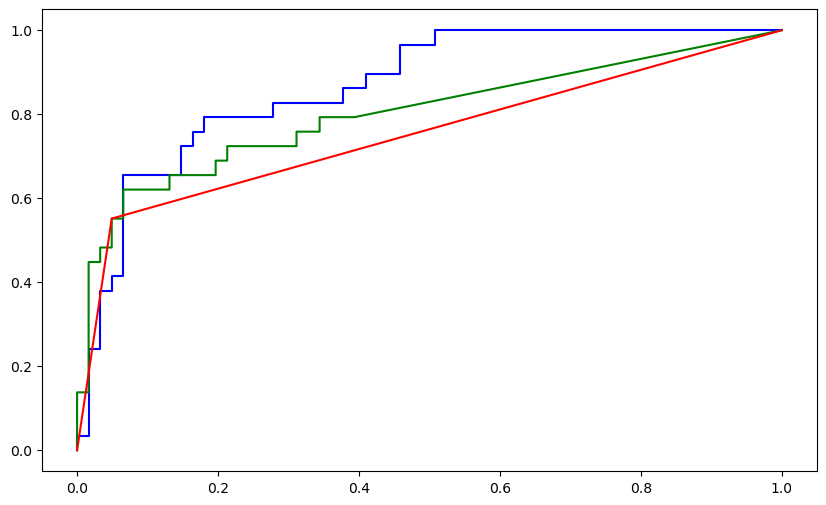

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_tree, tpr_tree, color='red', label=f'Decision Tree (AUC = {auc_tree:.2f})')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


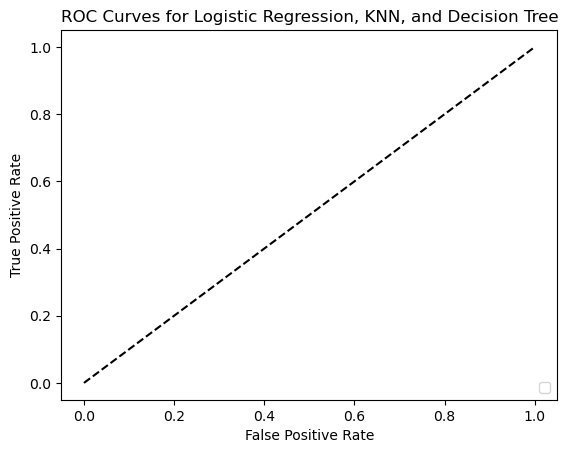

In [57]:
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('ROC Curves for Logistic Regression, KNN, and Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [58]:
print(f"Logistic Regression AUC: {auc_log_reg:.2f}")
print(f"KNN AUC: {auc_knn:.2f}")
print(f"Decision Tree AUC: {auc_tree:.2f}")

Logistic Regression AUC: 0.87
KNN AUC: 0.80
Decision Tree AUC: 0.75


7. **Conclusion**
   
Task 19: Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event.


Logistic Regression is the best-performing model based on accuracy and AUC.

The most important features were serum creatinine, ejection fraction, and age, all of which are clinically significant in predicting heart failure outcomes.